You are a data scientist in a health insurance company. In your firm, claims experts need to manually review claims. Every claim has some defining characteristics such as claims amount or treatment date (inputs.csv), as well as information on whether a claims expert was able to reject part of the claims amount (outcome.csv).

Using the following synthetic data, it is your job to predict whether an incoming claim will have a rejection. In preparing your results, please explore the features and their relationship to the review result, preprocess your data to improve model performance, train a baseline model to predict whether a rejection will be found.

Steps:

- Define  the task
- data exploration (defining if there's an outliers, missing values, duplicated rows, anomalies)
- data cleaning (handling the duplication, missing values, outliers, anomalies)
- EDA
- feature engeneering preparation for modeling
- Modeling
- evaluation

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

#Data exploration

In [3]:
income = pd.read_csv('in.csv')
output = pd.read_csv('out.csv')
print( '*'*50)
print(income.shape)
print( '*'*50)
income.sample(5)

**************************************************
(500, 7)
**************************************************


,ID,TREATMENT_DATE,RECEIVED_DATE,CLAIMS_TYPE,REVIEW_REASON,AGE,INVOICE_AMOUNT
374,7706968038750334892,2017-02-04,2017-10-28,Doctor consultation,undisclosed diagnoses,64,233.58
124,468274447170260817,2017-02-21,2017-09-16,Doctor consultation,duplicate payment,69,169.87
241,6906552841215701476,2017-02-17,2017-05-30,Doctor consultation,referral documentation,52,331.16
198,8962099175855340883,2017-02-19,2017-05-10,Prescription,referral documentation,53,7.70
137,4152502964190596621,2017-10-17,2017-12-19,Prescription,issue from previous review,63,129.98


In [4]:
print( '*'*50)
print(output.shape)
print( '*'*50)
output.head()

**************************************************
(501, 2)
**************************************************


,ID,REVIEW_RESULTED_IN_REJECTION
0,3453621322605639524,True
1,8128195827310128839,True
2,3450410363219081042,False
3,6058888927347395294,False
4,3669323013696141909,False


In [5]:
data = income.merge(output)

In [6]:
data.head()

,ID,TREATMENT_DATE,RECEIVED_DATE,CLAIMS_TYPE,REVIEW_REASON,AGE,INVOICE_AMOUNT,REVIEW_RESULTED_IN_REJECTION
0,3453621322605639524,2017-02-28,2017-03-11,Doctor consultation,issue from previous review,58,182.23,True
1,8128195827310128839,2017-05-11,2017-11-22,Prescription,duplicate payment,62,4133.05,True
2,3450410363219081042,2017-10-10,2017-11-03,Prescription,issue from previous review,66,36.76,False
3,6058888927347395294,2017-12-05,2018-01-06,Prescription,issue from previous review,76,52.72,False
4,3669323013696141909,2017-03-24,2017-04-29,Prescription,issue from previous review,64,119.80,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            501 non-null    int64  
 1   TREATMENT_DATE                501 non-null    object 
 2   RECEIVED_DATE                 501 non-null    object 
 3   CLAIMS_TYPE                   501 non-null    object 
 4   REVIEW_REASON                 501 non-null    object 
 5   AGE                           501 non-null    int64  
 6   INVOICE_AMOUNT                501 non-null    float64
 7   REVIEW_RESULTED_IN_REJECTION  500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 35.2+ KB


In [8]:
data.describe()

,ID,AGE,INVOICE_AMOUNT
count,5.010000e+02,501.000000,501.000000
mean,4.553911e+18,66.984032,347.590140
std,2.582491e+18,12.224719,904.939599
min,1.422575e+16,9.000000,0.000000
25%,2.427042e+18,62.000000,34.100000
50%,4.427805e+18,68.000000,112.240000
75%,6.680978e+18,75.000000,293.180000
max,9.195218e+18,192.000000,12491.890000


In [9]:
data['ID'].duplicated().sum()

1

In [10]:
data[data['ID'].duplicated()]

,ID,TREATMENT_DATE,RECEIVED_DATE,CLAIMS_TYPE,REVIEW_REASON,AGE,INVOICE_AMOUNT,REVIEW_RESULTED_IN_REJECTION
132,720632817420246612,2017-01-11,2017-04-20,Doctor consultation,issue from previous review,42,203.01,NaN


In [11]:
data[data['ID']==720632817420246612]

,ID,TREATMENT_DATE,RECEIVED_DATE,CLAIMS_TYPE,REVIEW_REASON,AGE,INVOICE_AMOUNT,REVIEW_RESULTED_IN_REJECTION
131,720632817420246612,2017-01-11,2017-04-20,Doctor consultation,issue from previous review,42,203.01,False
132,720632817420246612,2017-01-11,2017-04-20,Doctor consultation,issue from previous review,42,203.01,NaN


In [12]:
data.isnull().sum()

ID                              0
TREATMENT_DATE                  0
RECEIVED_DATE                   0
CLAIMS_TYPE                     0
REVIEW_REASON                   0
AGE                             0
INVOICE_AMOUNT                  0
REVIEW_RESULTED_IN_REJECTION    1
dtype: int64

ID                   AxesSubplot(0.125,0.798085;0.227941x0.0819149)
AGE               AxesSubplot(0.398529,0.798085;0.227941x0.0819149)
INVOICE_AMOUNT    AxesSubplot(0.672059,0.798085;0.227941x0.0819149)
dtype: object

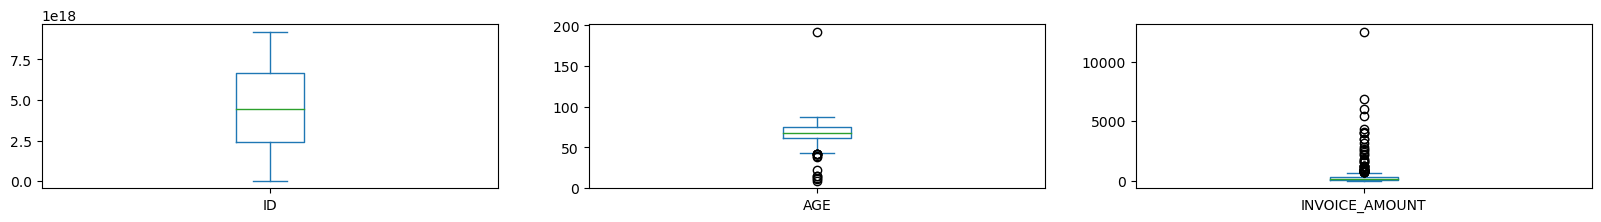

In [13]:
data.plot(kind='box', subplots = True, layout= (8,3), figsize = (20,20))

In [14]:
categ = data.select_dtypes(include = 'object')
for column in categ.columns:
  print('\n', categ[column].value_counts())


 2017-07-27    6
2017-02-21    6
2017-02-17    5
2017-05-19    5
2017-10-18    5
             ..
2017-06-26    1
2017-08-10    1
2017-05-04    1
2017-06-24    1
2017-01-21    1
Name: TREATMENT_DATE, Length: 237, dtype: int64

 2018-02-24    7
2017-10-10    6
2017-11-09    6
2017-06-29    5
2017-12-06    5
             ..
2017-09-23    1
2017-06-09    1
2018-04-12    1
2017-10-17    1
2017-12-04    1
Name: RECEIVED_DATE, Length: 259, dtype: int64

 Prescription            273
Doctor consultation     176
Medical aids             50
Alternative medicine      1
 doctor consultation      1
Name: CLAIMS_TYPE, dtype: int64

 issue from previous review    275
referral documentation        110
duplicate payment             103
undisclosed diagnoses          13
Name: REVIEW_REASON, dtype: int64

 False    396
True     104
Name: REVIEW_RESULTED_IN_REJECTION, dtype: int64


#Data preprocessing

In [15]:
data.dropna(inplace= True)

In [16]:
data.loc[data['AGE']==data['AGE'].max(), 'AGE']= data['AGE'].mean()
data.loc[data['INVOICE_AMOUNT'] == data['INVOICE_AMOUNT'].max(), 'INVOICE_AMOUNT'] = data['INVOICE_AMOUNT'].mean()

In [17]:
data['CLAIMS_TYPE'].value_counts()

Prescription            273
Doctor consultation     175
Medical aids             50
Alternative medicine      1
 doctor consultation      1
Name: CLAIMS_TYPE, dtype: int64

In [18]:
data['CLAIMS_TYPE'] = data['CLAIMS_TYPE'].apply(lambda x: x.strip().capitalize())

In [19]:
data['TREATMENT_DATE']= pd.to_datetime(data['TREATMENT_DATE'])
data['RECEIVED_DATE']= pd.to_datetime(data['RECEIVED_DATE'])

#EDA

In [20]:
data['date_difference'] = (data['RECEIVED_DATE'] - data['TREATMENT_DATE']).dt.days

In [21]:
data

,ID,TREATMENT_DATE,RECEIVED_DATE,CLAIMS_TYPE,REVIEW_REASON,AGE,INVOICE_AMOUNT,REVIEW_RESULTED_IN_REJECTION,date_difference
0,3453621322605639524,2017-02-28,2017-03-11,Doctor consultation,issue from previous review,58.0,182.23,True,11
1,8128195827310128839,2017-05-11,2017-11-22,Prescription,duplicate payment,62.0,4133.05,True,195
2,3450410363219081042,2017-10-10,2017-11-03,Prescription,issue from previous review,66.0,36.76,False,24
3,6058888927347395294,2017-12-05,2018-01-06,Prescription,issue from previous review,76.0,52.72,False,32
4,3669323013696141909,2017-03-24,2017-04-29,Prescription,issue from previous review,64.0,119.80,False,36
...,...,...,...,...,...,...,...,...,...
496,2753462497391643138,2017-03-04,2017-05-09,Doctor consultation,issue from previous review,79.0,592.20,False,66
497,1624497976737168861,2017-09-15,2017-10-07,Prescription,issue from previous review,71.0,30.28,False,22
498,5329544669103473941,2017-01-21,2017-01-24,Prescription,duplicate payment,63.0,43.70,False,3
499,7289136152180522355,2017-11-07,2017-12-04,Doctor consultation,referral documentation,63.0,195.79,False,27


<AxesSubplot: xlabel='date_difference'>

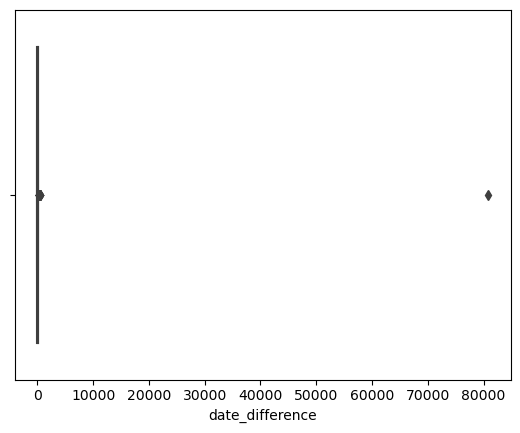

In [22]:
sns.boxplot(data = data, x= 'date_difference')

In [23]:
data['TREATMENT_DATE'].min()

Timestamp('1796-01-12 00:00:00')

In [24]:
data['TREATMENT_DATE'].replace( {data['TREATMENT_DATE'].min(): '2017-01-12 00:00:00'}, inplace= True)

In [25]:
data['TREATMENT_year']= data['TREATMENT_DATE'].dt.year
data['RECEIVED_year']= data['RECEIVED_DATE'].dt.year
data['TREATMENT_month']= data['TREATMENT_DATE'].dt.month
data['RECEIVED_month']= data['RECEIVED_DATE'].dt.month

In [26]:
date = [['TREATMENT_year', 'RECEIVED_year', 'TREATMENT_month', 'RECEIVED_month']]
data['TREATMENT_year'].value_counts()

2017    500
Name: TREATMENT_year, dtype: int64

In [27]:
data['RECEIVED_year'].value_counts()

2017    410
2018     90
Name: RECEIVED_year, dtype: int64

In [28]:
data['TREATMENT_month'].value_counts()

3     57
2     55
9     46
7     43
11    43
6     40
5     39
1     39
12    38
8     36
4     35
10    29
Name: TREATMENT_month, dtype: int64

In [29]:
data['RECEIVED_month'].value_counts()

3     51
10    46
12    46
1     45
5     45
4     44
9     43
7     41
2     39
11    37
6     36
8     27
Name: RECEIVED_month, dtype: int64

<AxesSubplot: xlabel='TREATMENT_month', ylabel='count'>

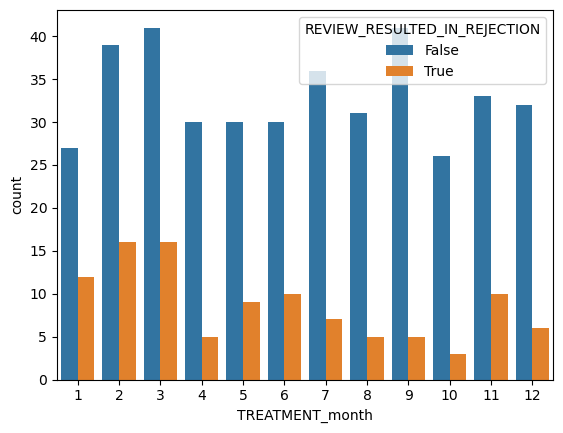

In [30]:
sns.countplot( data=data, x='TREATMENT_month', hue ='REVIEW_RESULTED_IN_REJECTION')

<AxesSubplot: xlabel='RECEIVED_month', ylabel='count'>

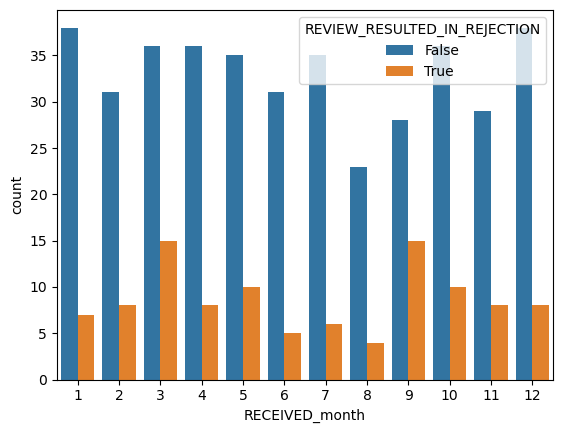

In [31]:
sns.countplot( data=data, x='RECEIVED_month', hue ='REVIEW_RESULTED_IN_REJECTION')

#model preparation

In [32]:
data['REVIEW_RESULTED_IN_REJECTION'].value_counts(normalize= True)

False    0.792
True     0.208
Name: REVIEW_RESULTED_IN_REJECTION, dtype: float64

<AxesSubplot: xlabel='REVIEW_RESULTED_IN_REJECTION', ylabel='count'>

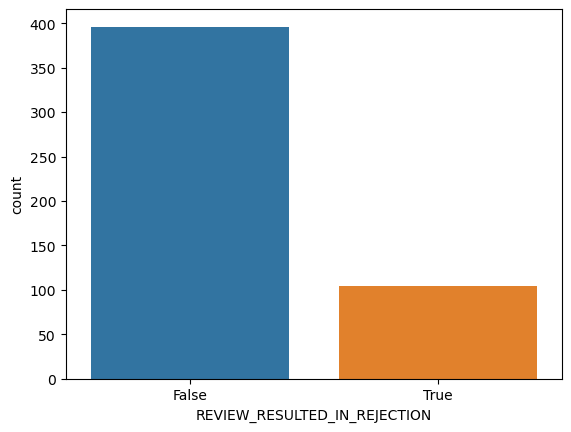

In [33]:
sns.countplot(data, x= 'REVIEW_RESULTED_IN_REJECTION')

In [34]:
data = pd.get_dummies(data, columns = ['CLAIMS_TYPE', 'REVIEW_REASON'], drop_first= True)

In [35]:
data['REVIEW_RESULTED_IN_REJECTION']= LabelEncoder().fit_transform(data['REVIEW_RESULTED_IN_REJECTION'])

In [36]:
x= data[[ 'AGE', 'INVOICE_AMOUNT',  'CLAIMS_TYPE_Doctor consultation',
       'CLAIMS_TYPE_Medical aids','date_difference', 'CLAIMS_TYPE_Prescription',
       'REVIEW_REASON_issue from previous review', 'date_difference',
       'REVIEW_REASON_referral documentation',
       'REVIEW_REASON_undisclosed diagnoses']]
y = data['REVIEW_RESULTED_IN_REJECTION']

In [37]:
x_train ,x_test, y_train, y_test = train_test_split(x , y , test_size= 0.2, random_state = 42, stratify= y)

In [38]:
over_sample = RandomOverSampler(sampling_strategy= 'minority', random_state = 42)

x_sample , y_sample = over_sample.fit_resample(x_train, y_train)

In [39]:
x_sample.shape

(634, 10)

In [40]:
y_sample.shape

(634,)

In [41]:
model = RandomForestClassifier(random_state = 42, n_estimators = 200)
model.fit(x_sample, y_sample)
y_pred= model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        79
           1       0.50      0.29      0.36        21

    accuracy                           0.79       100
   macro avg       0.66      0.60      0.62       100
weighted avg       0.76      0.79      0.77       100



In [42]:

model = RandomForestClassifier(random_state = 42, n_estimators = 200)
model.fit(x_sample, y_sample)
y_pred= model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        79
           1       0.50      0.29      0.36        21

    accuracy                           0.79       100
   macro avg       0.66      0.60      0.62       100
weighted avg       0.76      0.79      0.77       100



In [43]:
model = RandomForestClassifier(random_state = 42, n_estimators = 200)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        79
           1       0.57      0.19      0.29        21

    accuracy                           0.80       100
   macro avg       0.69      0.58      0.58       100
weighted avg       0.77      0.80      0.76       100



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 42, n_estimators= 200, max_depth= 5)
model.fit(x_sample, y_sample)
y_pred= model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        79
           1       0.44      0.19      0.27        21

    accuracy                           0.78       100
   macro avg       0.63      0.56      0.57       100
weighted avg       0.74      0.78      0.74       100



In [45]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [100,200], 'learning_rate' : [0.1,0.01,0.001], 'max_depth': [3,4,5]}
grid = GridSearchCV( estimator=GradientBoostingClassifier() ,param_grid =param , scoring = 'accuracy', cv =5 )
grid.fit(x_sample, y_sample)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [46]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        79
           1       0.00      0.00      0.00        21

    accuracy                           0.79       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.62      0.79      0.70       100



C:\Users\hayth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hayth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hayth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
